# Paper Results - Short-term Scenario

This notebooks aims to collect the simulation output and to produce the plots.

In [1]:
%matplotlib inline

import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy import interpolate
import os
from results import *
from os import listdir
from os.path import isfile, join
import re

### Initial Estimate constructors

In [2]:
scenario = "short-term"

files = {
    "With fouling": "cases/3/scenario_shortterm/model_complete/bc_pump/simulation.output.json",
    "Without fouling": "cases/3/scenario_shortterm/model_complete/bc_pump/simulationwithoutbiofilm.output.json",
}

dict_dynamic = read_all_data(files)

ix_list = (1,2,4,34)
line_style_list = ('k-','k--','k-.','k:')  
it_list = [0,20-1,40-1,-1]

Reading cases/3/scenario_shortterm/model_complete/bc_pump/simulation.output.json
Reading cases/3/scenario_shortterm/model_complete/bc_pump/simulationwithoutbiofilm.output.json


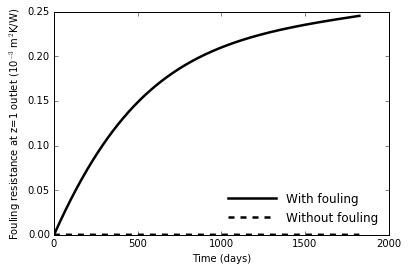

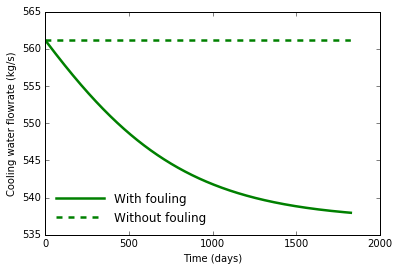

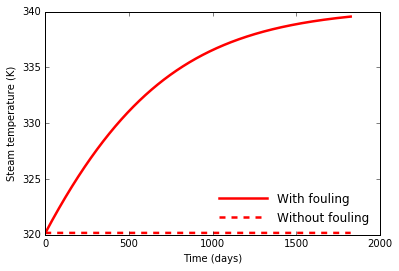

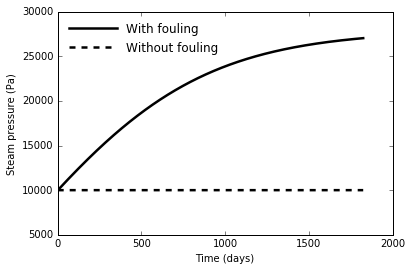

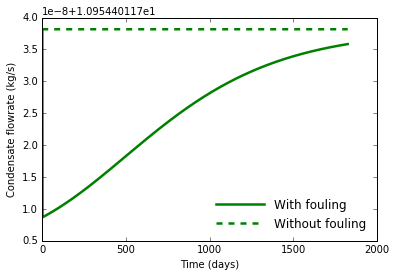

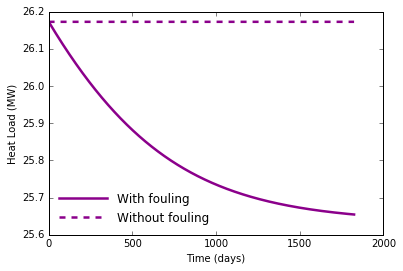

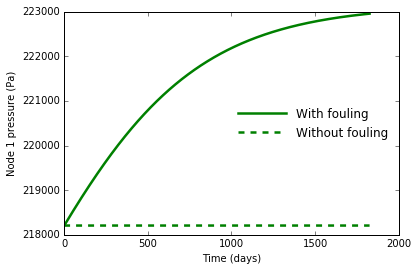

In [3]:
case1 = "With fouling"
case2 = "Without fouling"
plot_dict = prepare_data_0(dict_dynamic,case1,case2, tlim=5*365)
plot_curves_0(plot_dict, scenario=scenario)

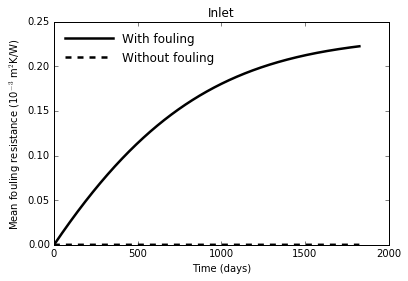

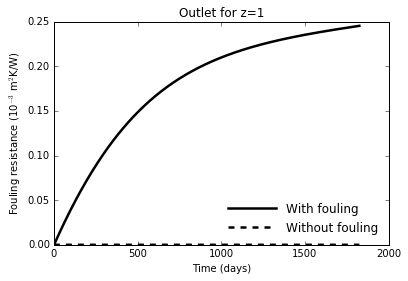

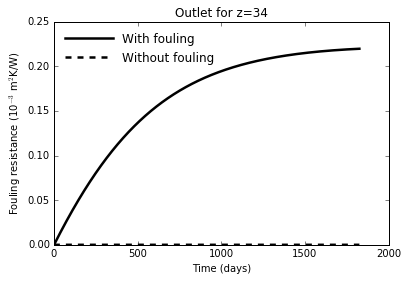

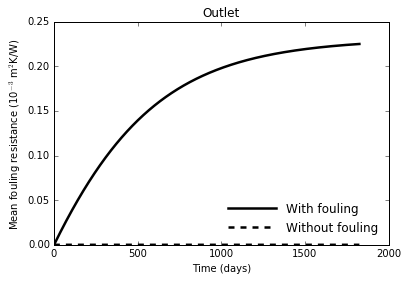

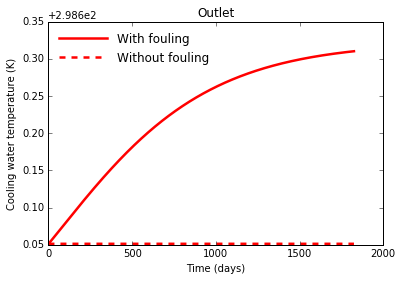

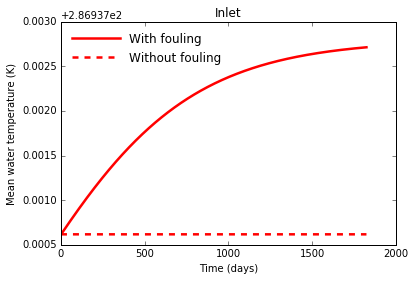

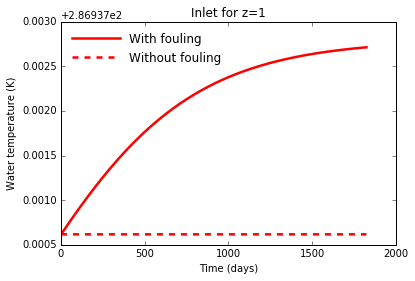

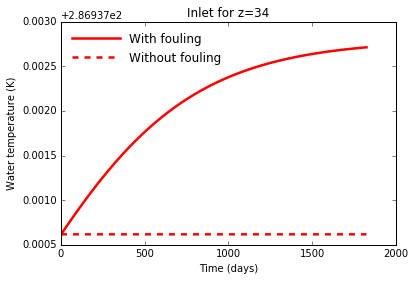

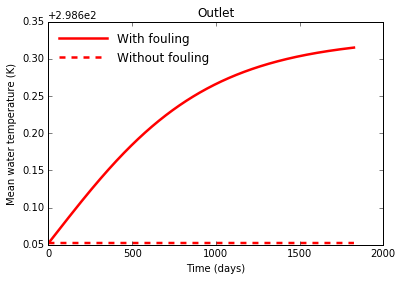

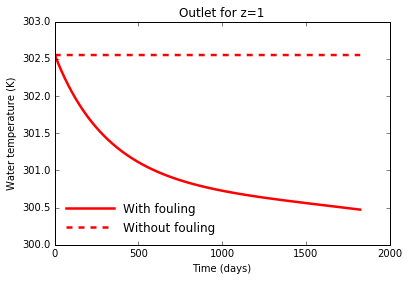

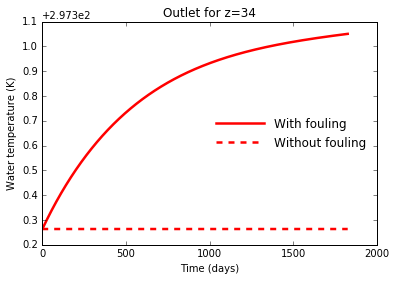

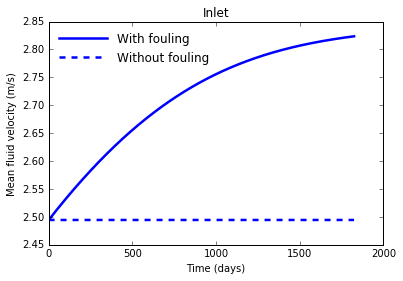

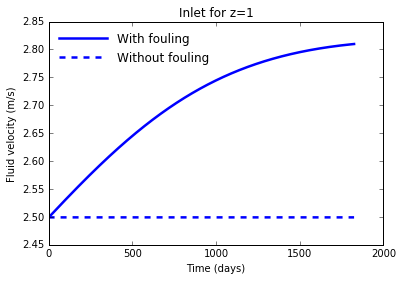

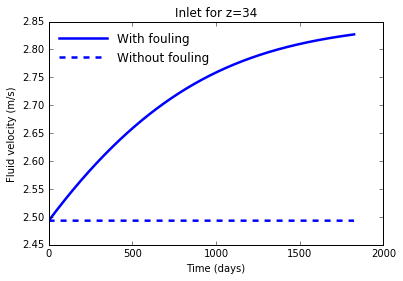

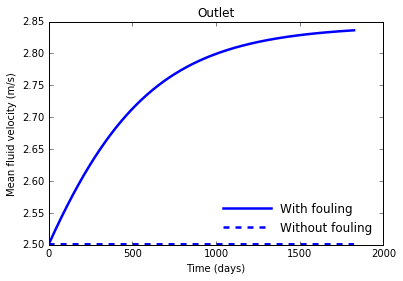

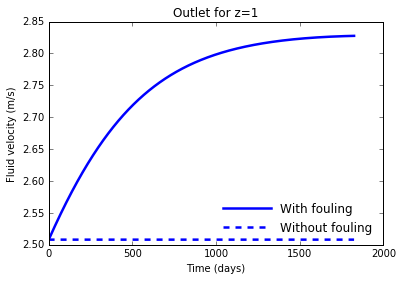

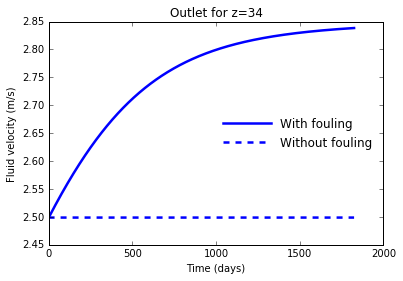

In [4]:
plot_dict = prepare_data_1(dict_dynamic, case1, case2, tlim=5*365)
plot_curves_1(plot_dict, scenario=scenario)

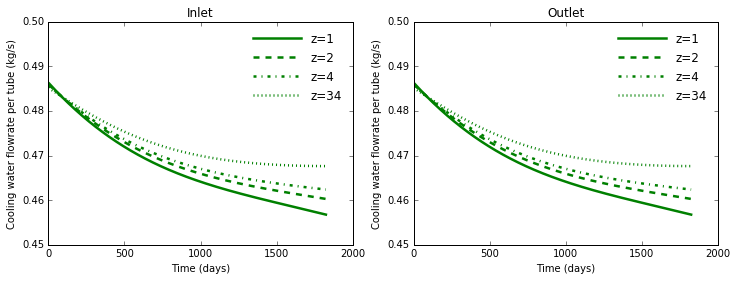

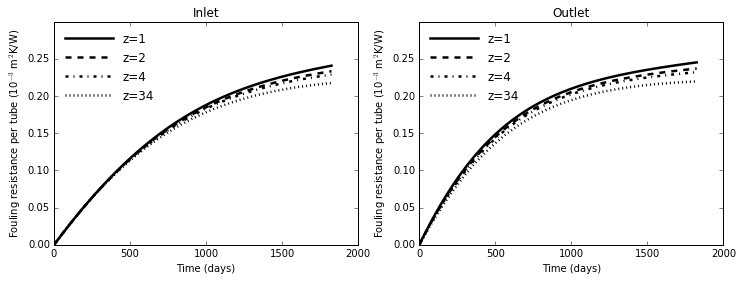

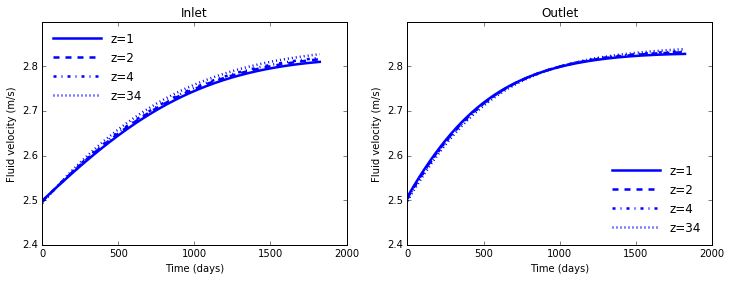

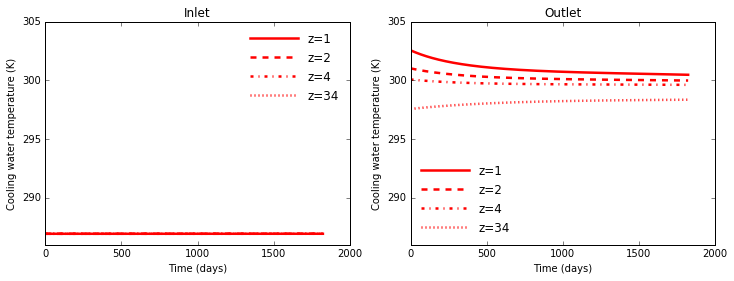

In [5]:
plot_dict = prepare_data_2(dict_dynamic, case1, tlim=5*365)
plot_curves_2(plot_dict, ix_list, line_style_list, scenario=scenario)

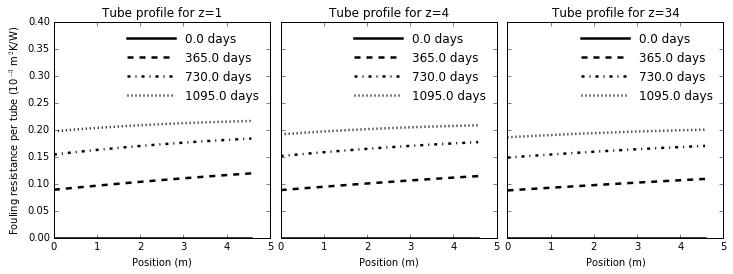

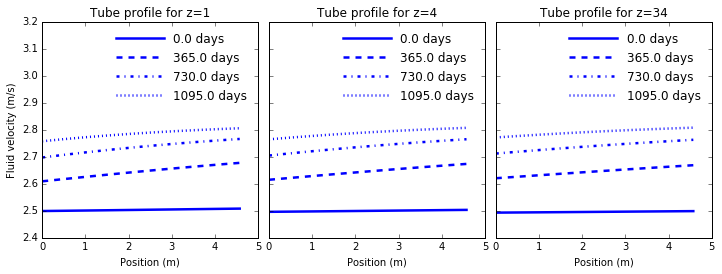

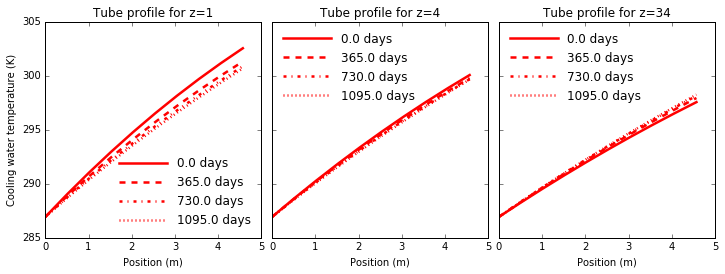

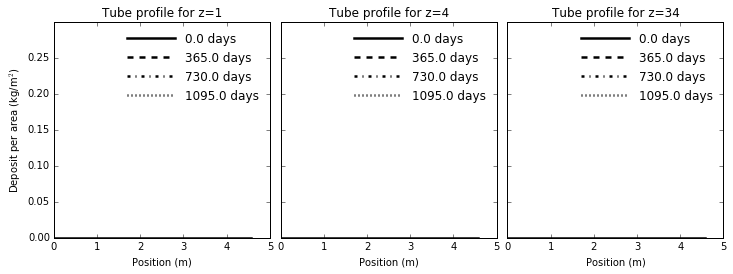

In [6]:
plot_dict = prepare_data_3(dict_dynamic, case1)
plot_curves_3(plot_dict, line_style_list, (0, 365+4, 2*365+4, 3*365+4, 4*365+4))

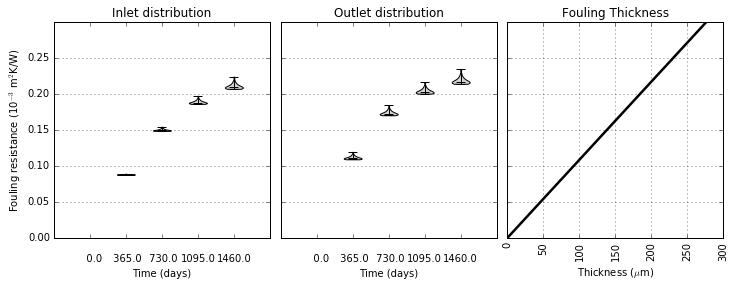

In [7]:
variable = 'condenser.Rf'
ymin = 0.0
ymax = 0.3
Rast = np.linspace(ymin, ymax, 100)
y2 = Rast
x2 = Rast / 2.941 * 2.71e3

plot_violins(dict_dynamic, case1, variable, x2, y2,
                 x2title = 'Fouling Thickness', 
                 x2label = 'Thickness ($\mu$m)',
                 yname = 'Fouling resistance (10$^{-3}$ m$^2$K/W)',
                 ymin=ymin, ymax=ymax, iy_list = (0, -1),
                 color1 = 'lightgray', color2 = 'black', factor = 1e3)


Fouling resistance (10$^{-3}$ m$^2$K/W)


/Users/jaimenms/PycharmProjects/celldeposit-condenser/.venv/lib/python3.6/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/jaimenms/PycharmProjects/celldeposit-condenser/.venv/lib/python3.6/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


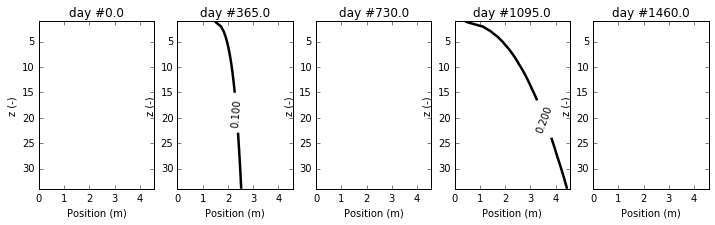

In [8]:
variable = 'condenser.Rf'
xvariable = 'condenser.L'
levels = (0.05, 0.1, 0.2, 0.25, 0.3)
color = "black" 
title = 'Fouling resistance (10$^{-3}$ m$^2$K/W)'

plot_contour(dict_dynamic, case1, variable, xvariable, levels, color, title, factor = 1e3)

Water temperature (K) at {} days


/Users/jaimenms/PycharmProjects/celldeposit-condenser/.venv/lib/python3.6/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/jaimenms/PycharmProjects/celldeposit-condenser/.venv/lib/python3.6/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


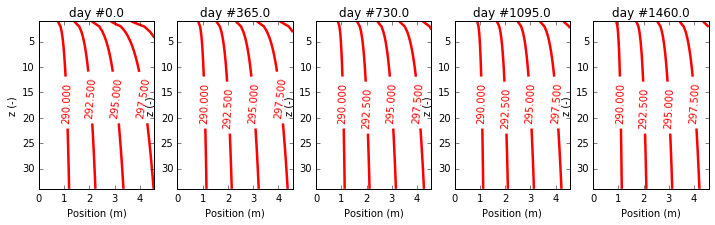

In [9]:
variable = 'condenser.T'
xvariable = 'condenser.L'
levels = (290, 292.5, 295, 297.5, 300)
color = "red" 
title = 'Water temperature (K) at {} days'

plot_contour(dict_dynamic, case1, variable, xvariable, levels, color, title)

In [10]:
scenario_ = scenario

mypath = "./pdfs/"
file_kind = "pdf"
onlyfiles = [f[:-4] for f in listdir(mypath) if (isfile(join(mypath, f)) and f[-len(file_kind):] == file_kind and re.match(scenario_,f))]

for name in onlyfiles:
    name2 = name.replace("-","_").replace(".","_")
    txt = r"\begin{figure} \centering \includegraphics[scale=0.5]{{"+name+r"}.pdf} \caption{"+name2+r"} \label{"+name2+r"} \end{figure}"
    print("%s"%txt)
    print()

\begin{figure} \centering \includegraphics[scale=0.5]{{short-term_curve2_condenser.k}.pdf} \caption{short_term_curve2_condenser_k} \label{short_term_curve2_condenser_k} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{short-term_curve0_condenser.Pext}.pdf} \caption{short_term_curve0_condenser_Pext} \label{short_term_curve0_condenser_Pext} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{short-term_curve0_condenser.Rf}.pdf} \caption{short_term_curve0_condenser_Rf} \label{short_term_curve0_condenser_Rf} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{short-term_curve1_condenser.vinlet}.pdf} \caption{short_term_curve1_condenser_vinlet} \label{short_term_curve1_condenser_vinlet} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{short-term_curve1_condenser.Toutlet}.pdf} \caption{short_term_curve1_condenser_Toutlet} \label{short_term_curve1_condenser_Toutlet} \end{figure}

\begin{figure} \centering \includegraphi

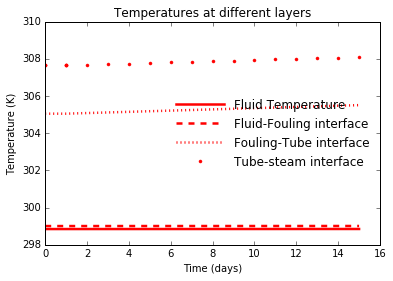

In [11]:
iz = 10

tlim = 15
t1 = dict_dynamic[case1]['condenser.Rf']['Times']

T = dict_dynamic[case1]['condenser.T']['Values'][:, -1, iz]
Qout = dict_dynamic[case1]['condenser.Qout']['Values'][:, -1, iz]
D = dict_dynamic[case1]['condenser.D']['Values'][:, -1, iz]
hint = dict_dynamic[case1]['condenser.hint']['Values'][:, -1, iz]
Tfilmi = 3.1416*D*hint/Qout + T

plot_dict_i = {
    't1': t1[t1 <= tlim],
    'T': T[t1 <= tlim],
    'Tfilmi': Tfilmi[t1 <= tlim],
    'Ti': dict_dynamic[case1]['condenser.Ti']['Values'][:, -1, iz][t1 <= tlim],
    'To': dict_dynamic[case1]['condenser.To']['Values'][:, -1, iz][t1 <= tlim],
}

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(plot_dict_i['t1'], plot_dict_i['T'], 'k-', lw=2.5, label="Fluid Temperature")
ax.plot(plot_dict_i['t1'], plot_dict_i['Tfilmi'], 'k--', lw=2.5, label="Fluid-Fouling interface")
ax.plot(plot_dict_i['t1'], plot_dict_i['Ti'], 'k:', lw=2.5, label="Fouling-Tube interface")
ax.plot(plot_dict_i['t1'], plot_dict_i['To'], 'k.', lw=2.5, label="Tube-steam interface")
for ax in plt.gcf().axes:
    for line in ax.get_lines():
        line.set_color("red")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Temperature (K)")
ax.autoscale(enable=True, axis='both', tight=None)

plt.legend(frameon=False, loc="best", ncol=1, handlelength=4, numpoints=1)
ax.set_title("Temperatures at different layers")
plt.show()